# ADA PROJECT P1

Here we will load the dataset and play around to get familiar with it. \
The dataset is the CMU Movie Summary Corpus

### Imports

In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xml.etree.ElementTree as ET
import gzip
from xml.dom import minidom

## Load the data
- load the data
- add multiple indexing
- first processing to have unique index

In [2]:
# take a look at the data 

DATA_PATH = '../data/RAW/CMU_Movies_Dataset'
 
def process_data(path = DATA_PATH, size = 0):
    L = listdir(path)
    if (size !=0) :
        for i in range(0,min(size,len(L))):
            print(L[i])
    else :
        for file in L:
            print(file)
    return L

L = process_data()

plot_summaries.txt
movie.metadata.tsv
name.clusters.txt
README.txt
character.metadata.tsv
tvtropes.clusters.txt


### movie data

In [3]:
# load movie's data
name = ["Wikipedia movie ID",
        "Freebase movie ID",
        "Movie name",
        "Release date",
        "Box office revenue", 
        "Runtime", #minutes
        "Languages",
        "Countries",
        "Genres"]

MovieData = pd.read_csv(DATA_PATH+"/movie.metadata.tsv",
                        sep='\t',
                        header=None,
                       names = name,
                       index_col=["Wikipedia movie ID"])

MovieData.index.is_unique # as expected, every movie have a different index

True

In [4]:
MovieData.loc[29666067] #error in date:)

Freebase movie ID                                            /m/0fphzrf
Movie name                                               Hunting Season
Release date                                                 1010-12-02
Box office revenue                                           12160978.0
Runtime                                                           140.0
Languages             {"/m/02hwyss": "Turkish Language", "/m/02h40lc...
Countries                                       {"/m/01znc_": "Turkey"}
Genres                {"/m/0lsxr": "Crime Fiction", "/m/02n4kr": "My...
Name: 29666067, dtype: object

In [5]:
MovieData.head(3)

,Freebase movie ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
Wikipedia movie ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [6]:
MovieData.loc[975900]

Freebase movie ID                                             /m/03vyhn
Movie name                                               Ghosts of Mars
Release date                                                 2001-08-24
Box office revenue                                           14010832.0
Runtime                                                            98.0
Languages                            {"/m/02h40lc": "English Language"}
Countries                     {"/m/09c7w0": "United States of America"}
Genres                {"/m/01jfsb": "Thriller", "/m/06n90": "Science...
Name: 975900, dtype: object

### character data

In [7]:
name = ["Wikipedia movie ID",
        "Freebase movie ID",
        "Release date", 
        "Character Name",
        "Actor DOB",
        "Actor gender", 
        "Actor height", 
        "Actor ethnicity",
        "Actor Name",
        "Actor age at movie release",
        "Freebase character map",
        "Freebase character ID",
        "Freebase actor ID"]

CharacterData = pd.read_csv(DATA_PATH+"/character.metadata.tsv",
                        sep='\t',
                        header=None,
                        names = name,
                        index_col=['Wikipedia movie ID','Character Name','Actor Name'])

In [8]:
CharacterData.head(3)

Freebase movie ID  \
Wikipedia movie ID Character Name             Actor Name                             
975900             Akooshay                   Wanda De Jesus             /m/03vyhn   
                   Lieutenant Melanie Ballard Natasha Henstridge         /m/03vyhn   
                   Desolation Williams        Ice Cube                   /m/03vyhn   

                                                                 Release date  \
Wikipedia movie ID Character Name             Actor Name                        
975900             Akooshay                   Wanda De Jesus       2001-08-24   
                   Lieutenant Melanie Ballard Natasha Henstridge   2001-08-24   
                   Desolation Williams        Ice Cube             2001-08-24   

                                                                   Actor DOB  \
Wikipedia movie ID Character Name             Actor Name                       
975900             Akooshay                   Wanda De Jesus      1958-08-26   
                   Lieutenant Melanie Ballard Natasha Henstridge  1974-08-15   
                   Desolation Williams        Ice Cube            1969-06-15   

                                                                 Actor gender  \
Wikipedia movie ID Character Name             Actor Name                        
975900             Akooshay                   Wanda De Jesus                F   
                   Lieutenant Melanie Ballard Natasha Henstridge            F   
                   Desolation Williams        Ice Cube                      M   

                                                                  Actor height  \
Wikipedia movie ID Character Name             Actor Name                         
975900             Akooshay                   Wanda De Jesus             1.620   
                   Lieutenant Melanie Ballard Natasha Henstridge         1.780   
                   Desolation Williams        Ice Cube                   1.727   

                                                                 Actor ethnicity  \
Wikipedia movie ID Character Name             Actor Name                           
975900             Akooshay                   Wanda De Jesus                 NaN   
                   Lieutenant Melanie Ballard Natasha Henstridge      /m/044038p   
                   Desolation Williams        Ice Cube                   /m/0x67   

                                                                  Actor age at movie release  \
Wikipedia movie ID Character Name             Actor Name                                       
975900             Akooshay                   Wanda De Jesus                            42.0   
                   Lieutenant Melanie Ballard Natasha Henstridge                        27.0   
                   Desolation Williams        Ice Cube                                  32.0   

                                                                 Freebase character map  \
Wikipedia movie ID Character Name             Actor Name                                  
975900             Akooshay                   Wanda De Jesus                 /m/0bgchxw   
                   Lieutenant Melanie Ballard Natasha Henstridge              /m/0jys3m   
                   Desolation Williams        Ice Cube                        /m/0jys3g   

                                                                 Freebase character ID  \
Wikipedia movie ID Character Name             Actor Name                                 
975900             Akooshay                   Wanda De Jesus                /m/0bgcj3x   
                   Lieutenant Melanie Ballard Natasha Henstridge            /m/0bgchn4   
                   Desolation Williams        Ice Cube                      /m/0bgchn_   

                                                                 Freebase actor ID  
Wikipedia movie ID Character Name             Actor Name                            
975900             Akooshay    

In [9]:
# load all the characters of the movie 975900
CharacterData.loc[975900] #careful it is int

,,Freebase movie ID,Release date,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor age at movie release,Freebase character map,Freebase character ID,Freebase actor ID
Character Name,Actor Name,,,,,,,,,,
Akooshay,Wanda De Jesus,/m/03vyhn,2001-08-24,1958-08-26,F,1.620,NaN,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
Lieutenant Melanie Ballard,Natasha Henstridge,/m/03vyhn,2001-08-24,1974-08-15,F,1.780,/m/044038p,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
Desolation Williams,Ice Cube,/m/03vyhn,2001-08-24,1969-06-15,M,1.727,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
Sgt Jericho Butler,Jason Statham,/m/03vyhn,2001-08-24,1967-09-12,M,1.750,NaN,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
Bashira Kincaid,Clea DuVall,/m/03vyhn,2001-08-24,1977-09-25,F,1.650,NaN,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
Commander Helena Braddock,Pam Grier,/m/03vyhn,2001-08-24,1949-05-26,F,1.727,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
Whitlock,Joanna Cassidy,/m/03vyhn,2001-08-24,1945-08-02,F,1.753,NaN,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
Big Daddy Mars,Richard Cetrone,/m/03vyhn,2001-08-24,NaN,M,NaN,NaN,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
Michael Descanso,Liam Waite,/m/03vyhn,2001-08-24,1971-03-20,M,1.892,NaN,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0


In [10]:
CharacterData.index.is_unique 

False

Index with movie ID and character names : The indexing is not unique. 

It is strange as it will mean there is sometimes two row where the movie and the character's name is the same. It could happen when 2 actors play the same characters (different age, or change of actor during the movie…)

We added the Actor Name, still not unique. Why ? Let's find out !

In [11]:
duplicates = CharacterData.index.duplicated(keep=False)
duplicate_rows = CharacterData[duplicates]
duplicate_rows

Freebase movie ID Release date  \
Wikipedia movie ID Character Name Actor Name                                    
29528534           Dr. Pramila    Smita Patil         /m/04j0lfk         1986   
                                  Smita Patil         /m/04j0lfk         1986   
25019575           NaN            NaN                 /m/09k6mnp         2001   
                                  NaN                 /m/09k6mnp         2001   
                                  NaN                 /m/09k6mnp         2001   
...                                                          ...          ...   
7533970            NaN            NaN                  /m/0kv9xq         1925   
28417976           Jay            James McAvoy        /m/047n8hd   2002-12-11   
                                  James McAvoy        /m/047n8hd   2002-12-11   
21772949           NaN            Tony Martin         /m/05mspcd      1948-04   
                                  Tony Martin         /m/05mspcd      1948-04   

                                                 Actor DOB Actor gender  \
Wikipedia movie ID Character Name Actor Name                              
29528534           Dr. Pramila    Smita Patil   1955-10-17            F   
                                  Smita Patil   1955-10-17            F   
25019575           NaN            NaN                  NaN          NaN   
                                  NaN                  NaN          NaN   
                                  NaN                  NaN          NaN   
...                                                    ...          ...   
7533970            NaN            NaN                  NaN          NaN   
28417976           Jay            James McAvoy  1979-04-21            M   
                                  James McAvoy  1979-04-21            M   
21772949           NaN            Tony Martin   1913-12-25            M   
                                  Tony Martin   1957-04-19            M   

                                                Actor height Actor ethnicity  \
Wikipedia movie ID Character Name Actor Name                                   
29528534           Dr. Pramila    Smita Patil            NaN       /m/0cqgdq   
                                  Smita Patil            NaN       /m/0cqgdq   
25019575           NaN            NaN                    NaN             NaN   
                                  NaN                    NaN             NaN   
                                  NaN                    NaN             NaN   
...                                                      ...             ...   
7533970            NaN            NaN                    NaN             NaN   
28417976           Jay            James McAvoy           1.7       /m/03lmx1   
                                  James McAvoy           1.7       /m/03lmx1   
21772949           NaN            Tony Martin            NaN        /m/041rx   
                                  Tony Martin            NaN             NaN   

                                                Actor age at movie release  \
Wikipedia movie ID Character Name Actor Name                                 
29528534           Dr. Pramila    Smita Patil                         30.0   
                                  Smita Patil                         30.0   
25019575           NaN            NaN                                  NaN   
                                  NaN                                  NaN   
                                  NaN                                  NaN   
...                                                                    ...   
7533970            NaN            NaN                                  NaN   
28417976           Jay            James McAvoy                        23.0   
                                  James McAvoy                        23.0   
21772949           NaN            Tony Martin                          NaN   
                                  Tony M

it look like sometimes, even if the character ID is similar, the row is duplicated and the Freebase character ID and Freebase character map are different. \ Consequently, to explore the data without the freebase we could just remove these columns, and use theses ID for indexing in the rest of the study !

In [12]:
CharacterDataUnique = CharacterData.drop(["Freebase character map","Freebase character ID"])
duplicates = CharacterDataUnique.index.duplicated(keep='first')
CharacterDataUnique  = CharacterDataUnique[~duplicates]
CharacterDataUnique.index.is_unique

True

### other data

In [13]:
name = ["Wikipedia movie ID",
        "Plot"]

Plot = pd.read_csv(DATA_PATH+"/plot_summaries.txt",
                   delimiter='\t',
                   header=None,
                   names = name,)

In [14]:
Plot.head(5)

,Wikipedia movie ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [15]:
PlotData = Plot.set_index("Wikipedia movie ID")
PlotData

,Plot
Wikipedia movie ID,
23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
31186339,The nation of Panem consists of a wealthy Capi...
20663735,Poovalli Induchoodan is sentenced for six yea...
2231378,"The Lemon Drop Kid , a New York City swindler,..."
595909,Seventh-day Adventist Church pastor Michael Ch...
...,...
34808485,"The story is about Reema , a young Muslim scho..."
1096473,"In 1928 Hollywood, director Leo Andreyev look..."
35102018,American Luthier focuses on Randy Parsons’ tra...


## First exploration

In [16]:
#print all info for a movie.
# should we use name or ID ? I will use ID

def movie_information(ID):
    print("Movie\n") 
    display(MovieData.loc[ID])
    print("\nCharacters")
    #display(CharacterDataUnique.loc[ID])
    print("\nPlot")
    display(PlotData.loc[ID]["Plot"])

movie_information(35099643)

Movie



Freebase movie ID                      /m/0j6359f
Movie name                 Banned From Television
Release date                                 1998
Box office revenue                     10000000.0
Runtime                                     144.0
Languages                                      {}
Countries                                      {}
Genres                {"/m/0jtdp": "Documentary"}
Name: 35099643, dtype: object


Characters

Plot


" The film opens with a montage of some of the clips that are used throughout the film. After this the film begins. In Rio de Janeiro, Brazil, a man with a knife holds an innocent baby as hostage. Police surround him and when he gets distracted an officer shoots him in the head, killing him instantly. The baby is taken away unharmed. On a street in Butte, Montana, Terry Rossland, an enraged and distraught man, sits in his car armed with pipe bombs and gasoline demanding to see his family. When the police surround him, Rossland blows the car up, then exits the vehicle and runs away on fire as rescue teams try to keep him alive. He survives, but one year later commits suicide by a drug overdose. In Seoul, South Korea, angry protesters have taken over a construction tower and throw firebombs at innocent construction workers. One of the workers is set on fire but it is quickly put out by a fellow worker. Miraculously the worker is unharmed. In San Salvador, El Salvador, veterans hold worke

## Twitter emotion MLP

In [17]:
import twitter_emotion

/Users/djay/miniforge3/envs/ada/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
anger_data = []
for i in range(0,2000,1):
    if Plot.iloc[i]["Wikipedia movie ID"] in MovieData.index:
        #print(MovieData.loc[Plot.iloc[i]["Wikipedia movie ID"]]["Movie name"])
        if (i%100 == 0) :
            print(i)
        #movie_information(Plot.iloc[i]["Wikipedia movie ID"])
        Scores = twitter_emotion.extract_emotion(Plot.iloc[i]["Plot"])
        if Scores[0] > 0.5 :
            anger_data.append(Plot.iloc[i]["Wikipedia movie ID"])

In [ ]:
MovieDataViolent = MovieData.loc[anger_data]

In [ ]:
MovieDataViolent

## distillBERT sentiment analysis

In [18]:
import DistillBERT_emotion

In [44]:
# Initialize the DataFrames
Anger = pd.DataFrame(columns=["ID", "Score"])
Sadness = pd.DataFrame(columns=["ID", "Score"])
Fear = pd.DataFrame(columns=["ID", "Score"])
Violent = pd.DataFrame(columns=["ID", "Score"])

# Lists to accumulate rows for efficiency
anger_rows = []
sadness_rows = []
fear_rows = []
violent_rows = []

for i in range(0, Plot.shape[0], 1):
    if Plot.iloc[i]["Wikipedia movie ID"] in MovieData.index:
        ID = MovieData.loc[Plot.iloc[i]["Wikipedia movie ID"]]["Movie name"]
        
        # Debugging print every 100th iteration
        if i % 100 == 0:
            print(i)
        
        result = detector.analyze_violence(Plot.iloc[i]["Plot"])
        
        # print(f"Violence Level: {result['violence_level']}")
        # print(f"Sadness Score: {result['sadness_score']:.2f}")
        # print(f"Anger Score: {result['anger_score']:.2f}")
        # print(f"Fear Score: {result['fear_score']:.2f}")
        
        # Append rows to lists based on conditions
        if result['sadness_score'] > 0.5:
            sadness_rows.append({"ID": ID, "Score": result['sadness_score']})
        elif result['anger_score'] > 0.5:
            anger_rows.append({"ID": ID, "Score": result['anger_score']})
        elif result['fear_score'] > 0.5:
            fear_rows.append({"ID": ID, "Score": result['fear_score']})
        
        # Calculate violence score
        V = 0.25 * result['sadness_score'] + 0.5 * result['anger_score'] + 0.25 * result['fear_score']
        
        if V > 0.8:
            violent_rows.append({"ID": ID, "Score": V})

# After the loop, convert lists to DataFrames
Sadness = pd.DataFrame(sadness_rows)
Anger = pd.DataFrame(anger_rows)
Fear = pd.DataFrame(fear_rows)
Violent = pd.DataFrame(violent_rows) 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

/var/folders/2y/_yhdrpzj5kb7clnr0qc0chxc0000gn/T/ipykernel_55888/149289720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='ID', data=Sadness_sorted, ax=axes[0, 0], palette="Blues_d")
/var/folders/2y/_yhdrpzj5kb7clnr0qc0chxc0000gn/T/ipykernel_55888/149289720.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='ID', data=Anger_sorted, ax=axes[0, 1], palette="Reds_d")
/var/folders/2y/_yhdrpzj5kb7clnr0qc0chxc0000gn/T/ipykernel_55888/149289720.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='ID',

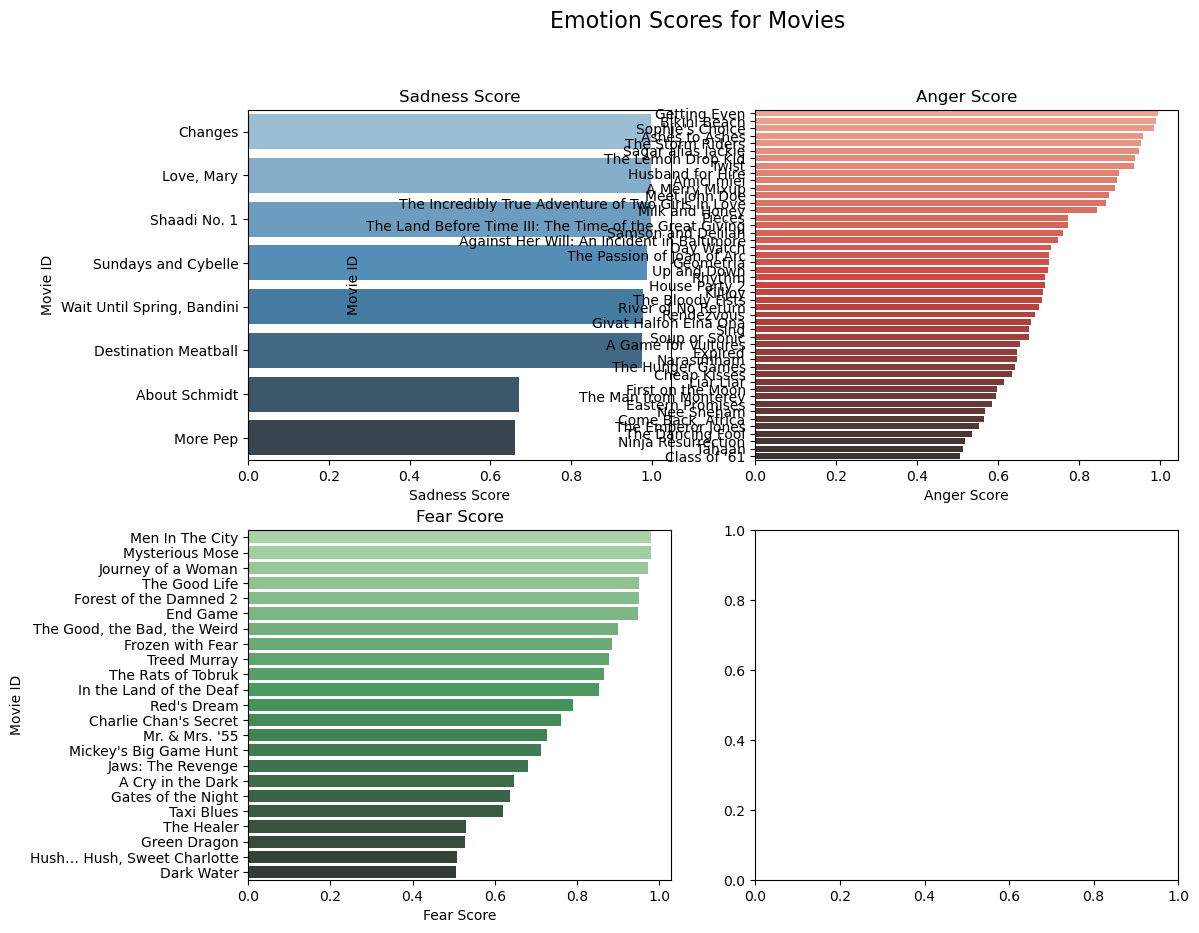

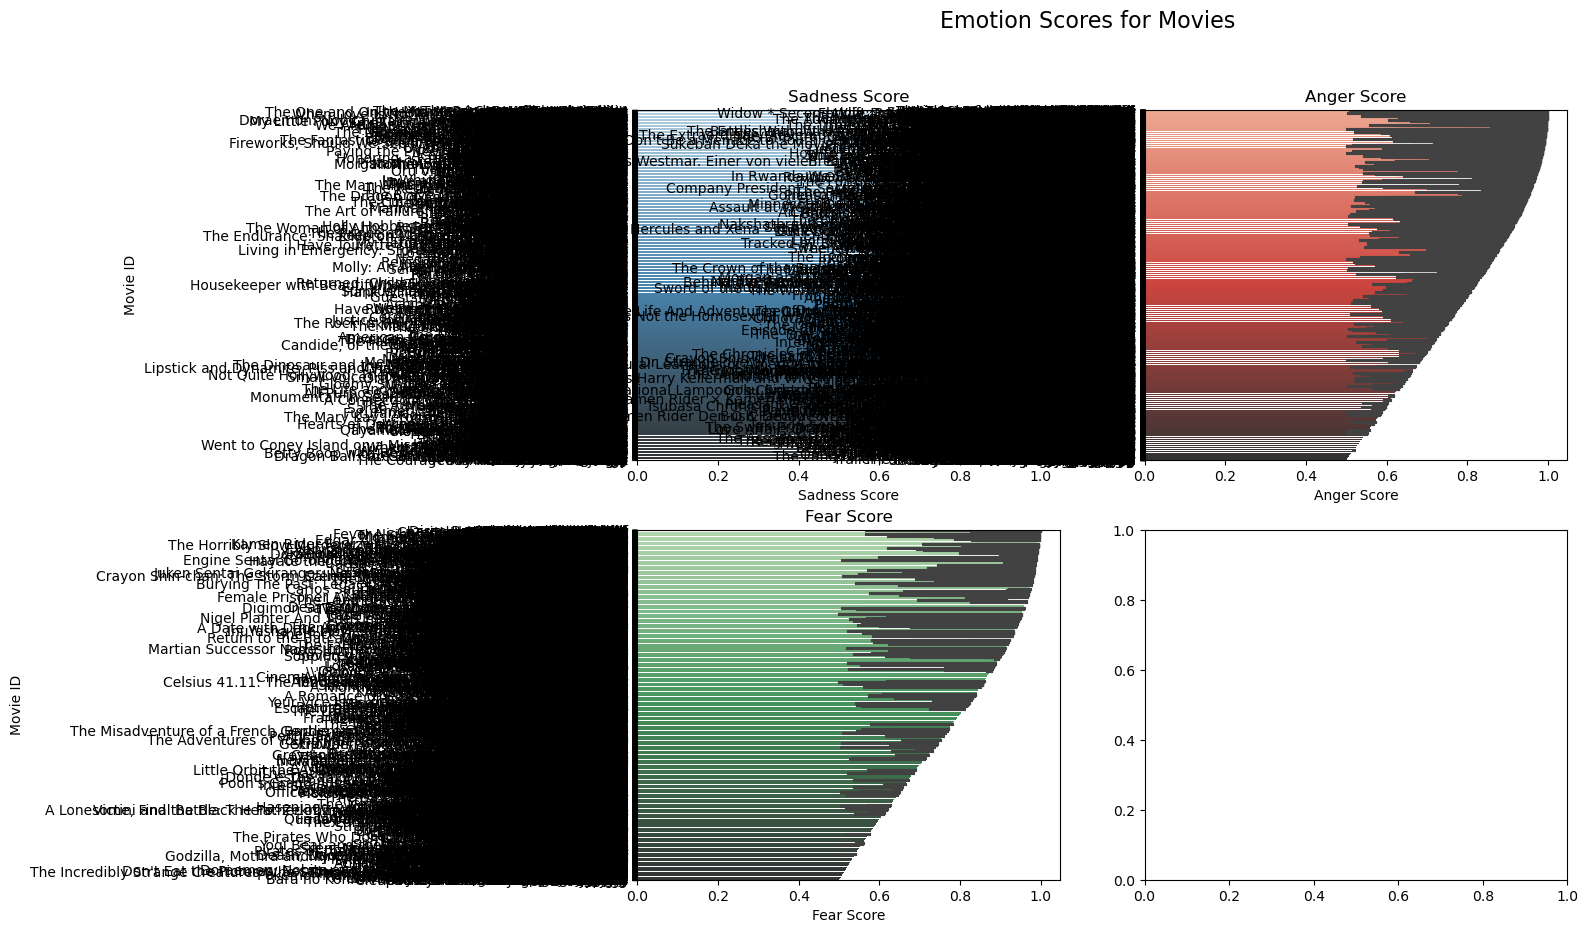

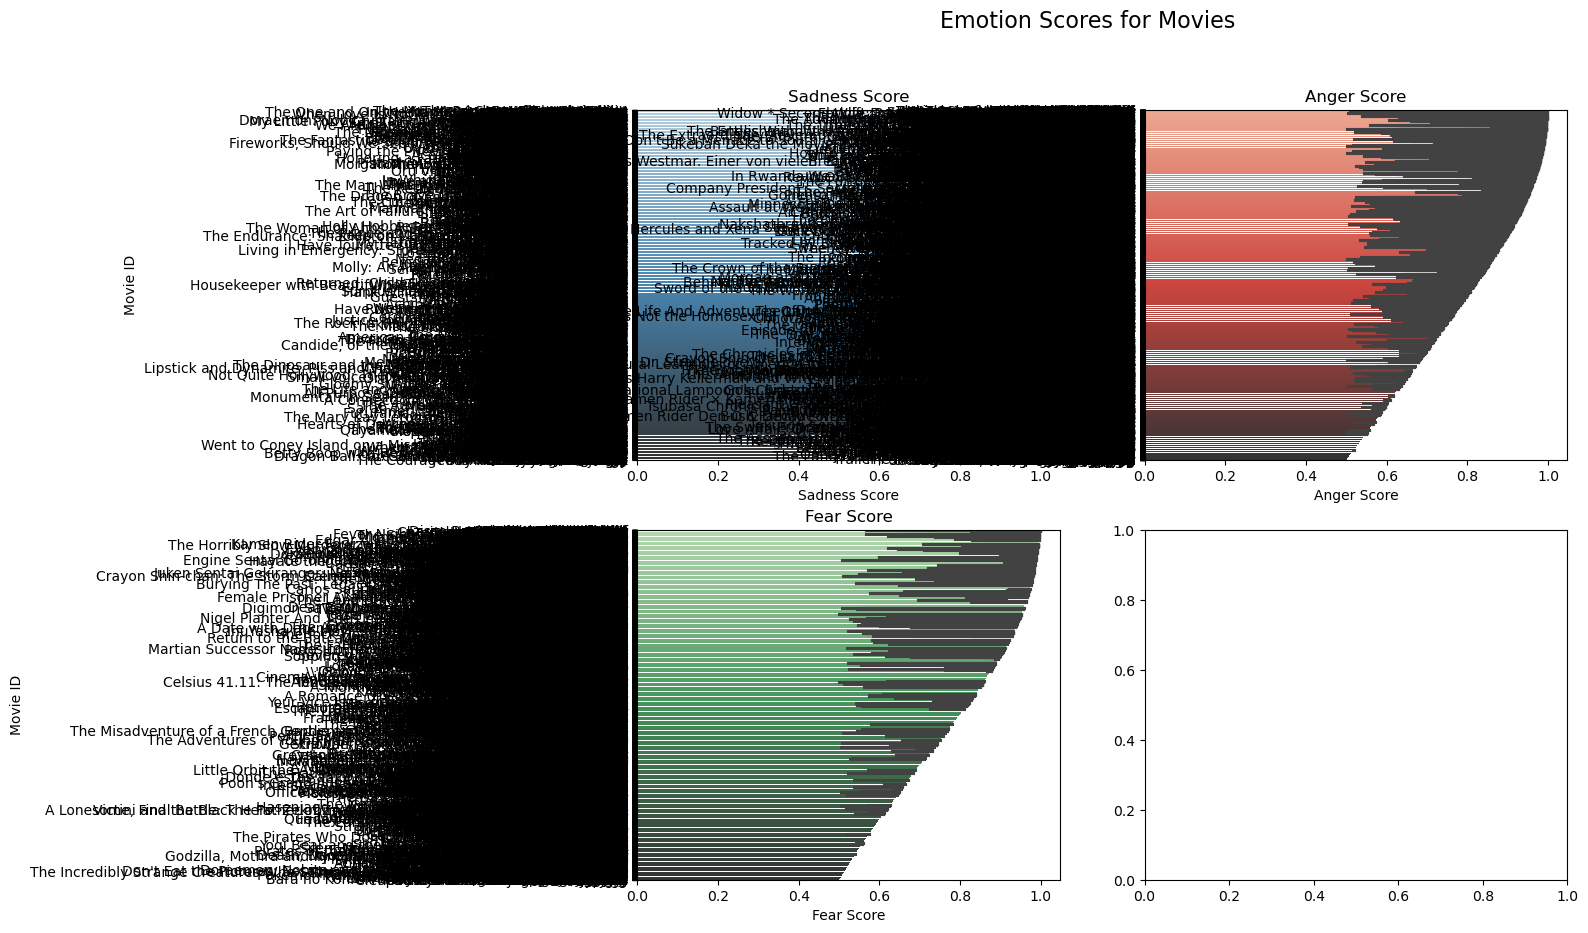

In [ ]:
import seaborn as sns

# Sort the Sadness DataFrame by Score in descending order
Sadness_sorted = Sadness.sort_values(by="Score", ascending=False)

# Create a figure with subplots (adjust the number of rows and columns as needed)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# Set a title for the entire figure
fig.suptitle('Emotion Scores for Movies', fontsize=16)

# Plot for Sadness
sns.barplot(x='Score', y='ID', data=Sadness_sorted, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title('Sadness Score')
axes[0, 0].set_xlabel('Sadness Score')
axes[0, 0].set_ylabel('Movie ID')

# Plot for Anger (using similar sorting process)
Anger_sorted = Anger.sort_values(by="Score", ascending=False)
sns.barplot(x='Score', y='ID', data=Anger_sorted, ax=axes[0, 1], palette="Reds_d")
axes[0, 1].set_title('Anger Score')
axes[0, 1].set_xlabel('Anger Score')
axes[0, 1].set_ylabel('Movie ID')

# Plot for Fear (using similar sorting process)
Fear_sorted = Fear.sort_values(by="Score", ascending=False)
sns.barplot(x='Score', y='ID', data=Fear_sorted, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title('Fear Score')
axes[1, 0].set_xlabel('Fear Score')
axes[1, 0].set_ylabel('Movie ID')

# Plot for Violence (using similar sorting process)
#Violent_sorted = Violent.sort_values(by="Score", ascending=False)
#sns.barplot(x='Score', y='ID', data=Violent_sorted, ax=axes[1, 1], palette="Purples_d")
#axes[1, 1].set_title('Violence Score')
#axes[1, 1].set_xlabel('Violence Score')
#axes[1, 1].set_ylabel('Movie ID')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

In [ ]:
Anger.to_csv('Anger.csv') 
Sadness.to_csv('Sadness.csv') 
Fear.to_csv('Fear.csv') 
Violent.to_csv('Violent.csv') 
